# Importing Packages

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [324]:
rawData = pd.read_csv("Datathon_Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")

states = set(rawData["State"]) 

for state in states:
    years = set(rawData[rawData["State"] == state]["Year"])
    for year in years:
        currentDF = rawData[(rawData["State"] == state) & (rawData["Year"] == year)]
        i = 1 
        for index, row in currentDF.iterrows():
            rawData.at[index, "Label (Grouping)"] = str(i) + " - " + row["Label (Grouping)"].strip()
            i += 1

In [325]:
rawData.head(200)

Label (Grouping)           Category  \
0                                1 - EMPLOYMENT STATUS             Header   
1                     2 - Population 16 years and over  EMPLOYMENT STATUS   
2                                   3 - In labor force  EMPLOYMENT STATUS   
3                             4 - Civilian labor force  EMPLOYMENT STATUS   
4                                         5 - Employed  EMPLOYMENT STATUS   
..                                                 ...                ...   
195  51 - Civilian employed population 16 years and...    CLASS OF WORKER   
196               52 - Private wage and salary workers    CLASS OF WORKER   
197                            53 - Government workers    CLASS OF WORKER   
198  54 - Self-employed in own not incorporated bus...    CLASS OF WORKER   
199                         55 - Unpaid family workers    CLASS OF WORKER   

       State   Estimate Margin of Error    Percent Percent Margin of Error  \
0    Alabama        NaN             NaN        NaN                     NaN   
1    Alabama  3,714,504          ±1,588  3,714,504                     (X)   
2    Alabama  2,246,848          ±5,576      60.5%                    ±0.1   
3    Alabama  2,230,879          ±5,531      60.1%                    ±0.1   
4    Alabama  2,036,867          ±5,904      54.8%                    ±0.2   
..       ...        ...             ...        ...                     ...   
195   Alaska    332,126          ±2,150    332,126                     (X)   
196   Alaska    222,955          ±2,485      67.1%                    ±0.5   
197   Alaska     84,606          ±1,614      25.5%                    ±0.5   
198   Alaska     23,532            ±785       7.1%                    ±0.2   
199   Alaska      1,033            ±235       0.3%                    ±0.1   

     Year  
0    2010  
1    2010  
2    2010  
3    2010  
4    2010  
..    ...  
195  2010  
196  2010  
197  2010  
198  2010  
199  2010  

[200 rows x 8 columns]

In [326]:
rawData = rawData.sort_values(by=['Year'], kind = 'stable')
rawData = rawData.drop(rawData[rawData["Category"] == "Header"].index)
rawData = rawData.replace('(X)', pd.NA)
rawData = rawData.replace(u'\xa0', u' ', regex=True)
rawData.iloc[:, 1:7] = rawData.iloc[:, 1:7].replace({",":""}, regex=True)
rawData.iloc[:, 4:7] = rawData.iloc[:, 4:7].replace({"±":""}, regex=True)
rawData.iloc[:, 4:7] = rawData.iloc[:, 4:7].replace({"%":""}, regex=True)

rawData.head(10)

Label (Grouping)           Category    State Estimate  \
1   2 - Population 16 years and over  EMPLOYMENT STATUS  Alabama  3714504   
2                 3 - In labor force  EMPLOYMENT STATUS  Alabama  2246848   
3           4 - Civilian labor force  EMPLOYMENT STATUS  Alabama  2230879   
4                       5 - Employed  EMPLOYMENT STATUS  Alabama  2036867   
5                     6 - Unemployed  EMPLOYMENT STATUS  Alabama   194012   
6                   7 - Armed Forces  EMPLOYMENT STATUS  Alabama    15969   
7             8 - Not in labor force  EMPLOYMENT STATUS  Alabama  1467656   
8           9 - Civilian labor force  EMPLOYMENT STATUS  Alabama  2230879   
9            10 - Percent Unemployed  EMPLOYMENT STATUS  Alabama     <NA>   
10    11 - Females 16 years and over  EMPLOYMENT STATUS  Alabama  1939093   

   Margin of Error  Percent Percent Margin of Error  Year  
1             1588  3714504                    <NA>  2010  
2             5576     60.5                     0.1  2010  
3             5531     60.1                     0.1  2010  
4             5904     54.8                     0.2  2010  
5             3179      5.2                     0.1  2010  
6              888      0.4                     0.1  2010  
7             5401     39.5                     0.1  2010  
8             5531  2230879                    <NA>  2010  
9             <NA>      8.7                     0.1  2010  
10            1296  1939093                    <NA>  2010

In [280]:
# Use to set NA estimate values to the median for 
for index, row in rawData[rawData["Percent"].isna()].iterrows():
    temp = rawData[(rawData["Label (Grouping)"] == row["Label (Grouping)"]) & (rawData["Year"] == row["Year"])]["Percent"]
    if temp.isnull().all():
        continue 
    pd.to_numeric(temp); 
    rawData.at[index, "Estimate"] = temp.median()

In [327]:
rawData["Estimate"] = pd.to_numeric(rawData["Estimate"])
rawData["Margin of Error"] = pd.to_numeric(rawData["Margin of Error"])
rawData["Percent"] = pd.to_numeric(rawData["Percent"])
rawData["Percent Margin of Error"] = pd.to_numeric(rawData["Percent Margin of Error"])

In [329]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92612 entries, 1 to 82939
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Label (Grouping)         92612 non-null  object 
 1   Category                 92612 non-null  object 
 2   State                    92612 non-null  object 
 3   Estimate                 76596 non-null  float64
 4   Margin of Error          76596 non-null  float64
 5   Percent                  79300 non-null  float64
 6   Percent Margin of Error  67184 non-null  float64
 7   Year                     92612 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 6.4+ MB


# Visualization

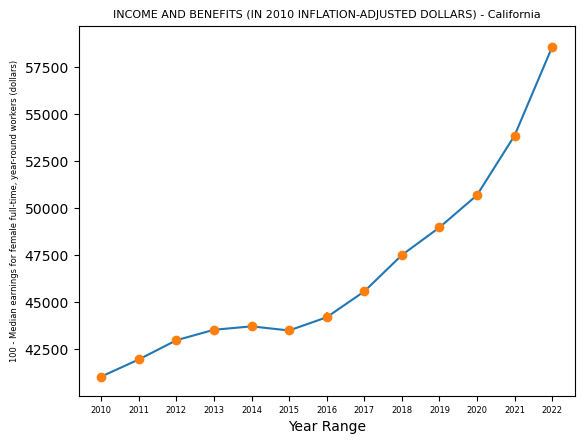

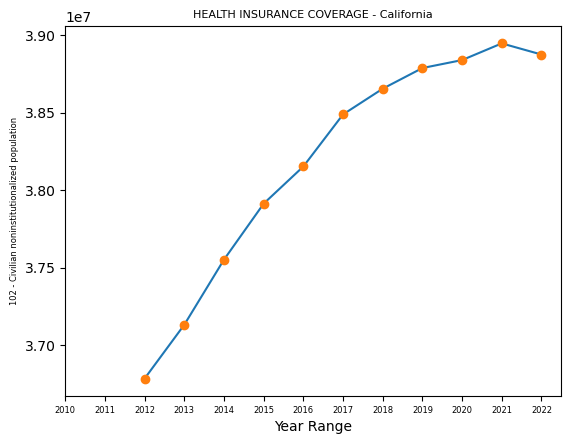

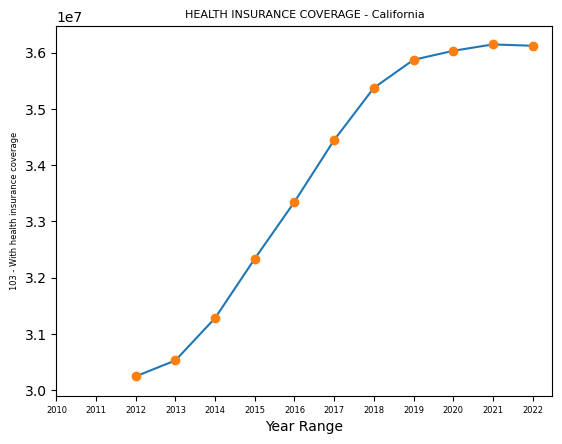

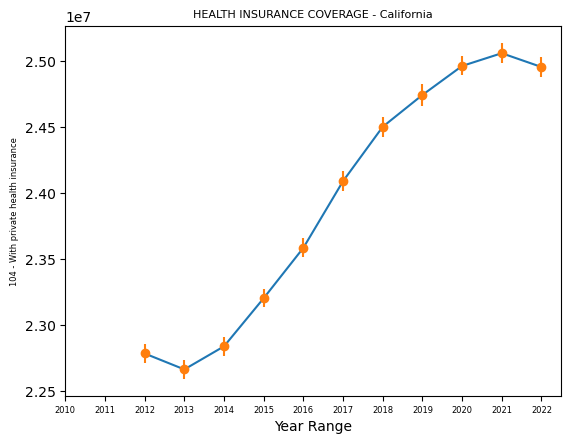

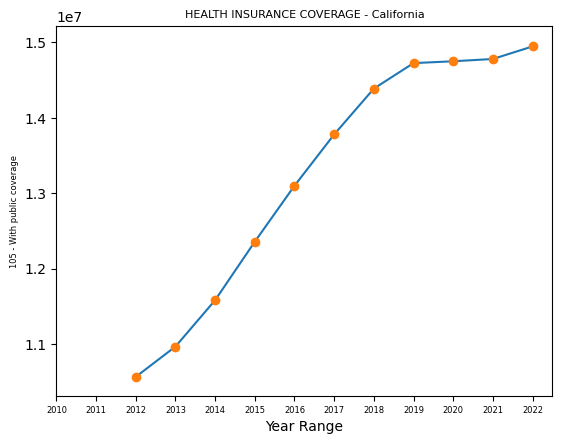

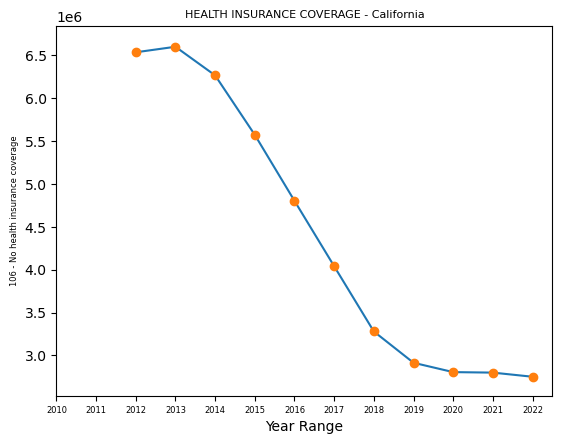

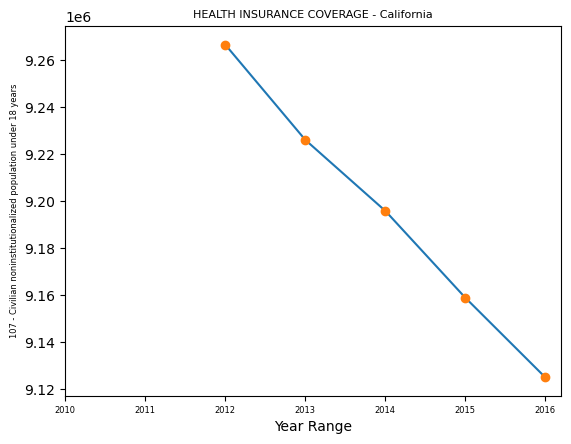

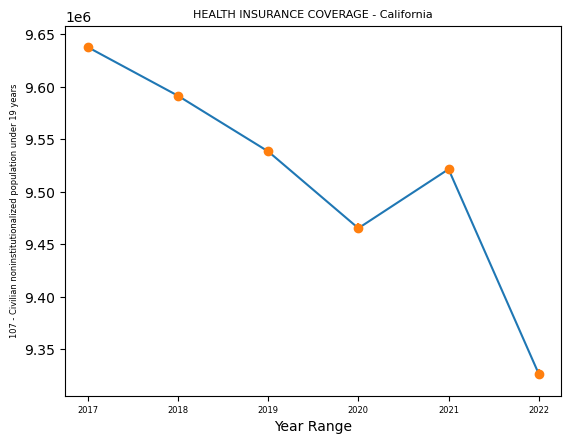

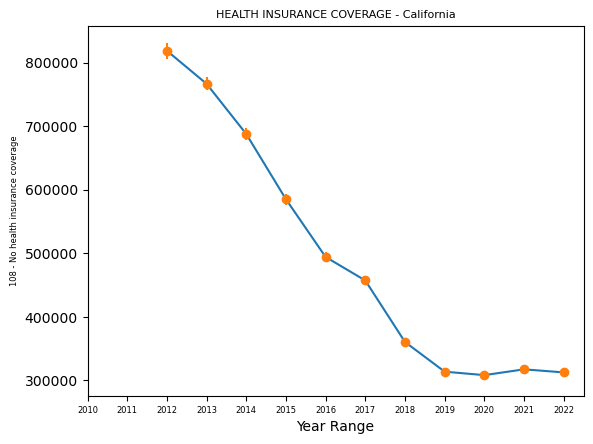

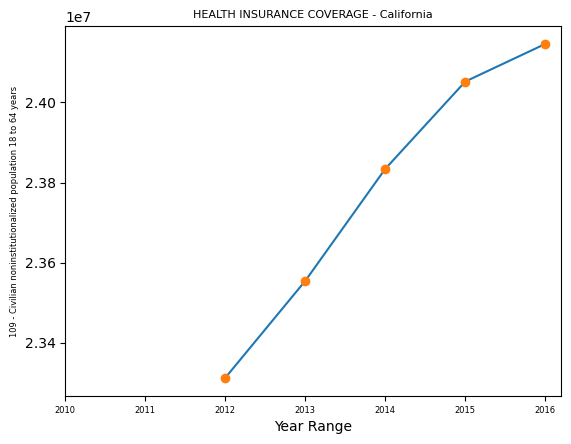

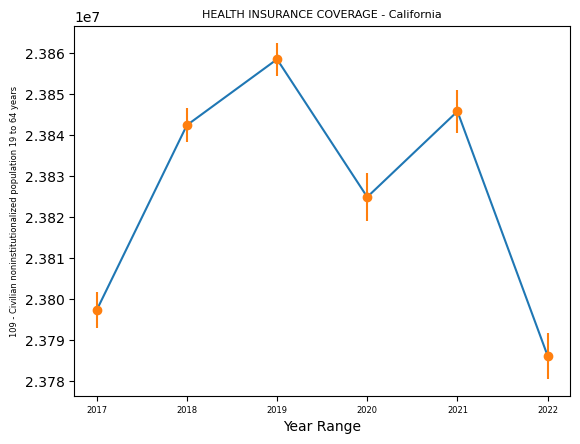

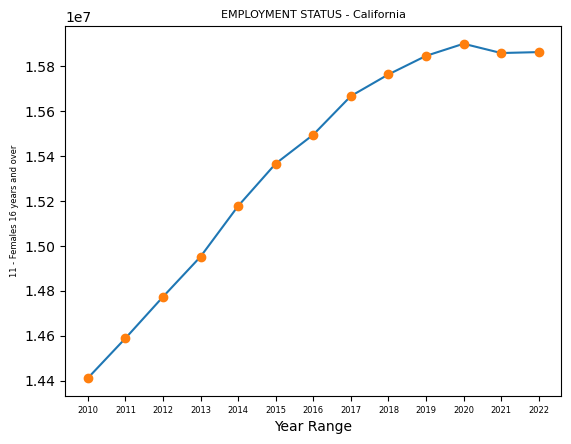

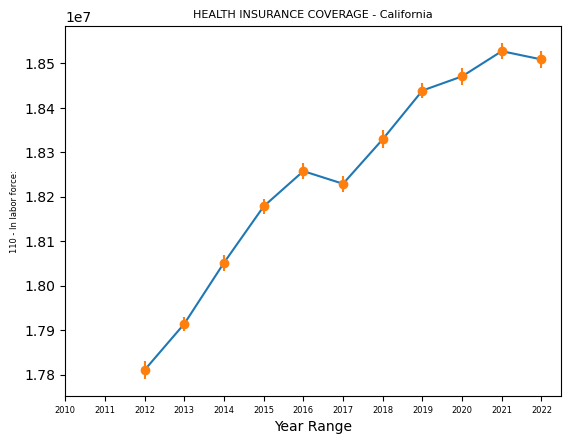

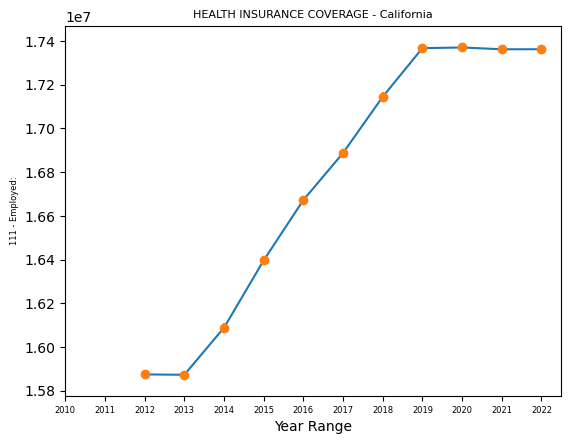

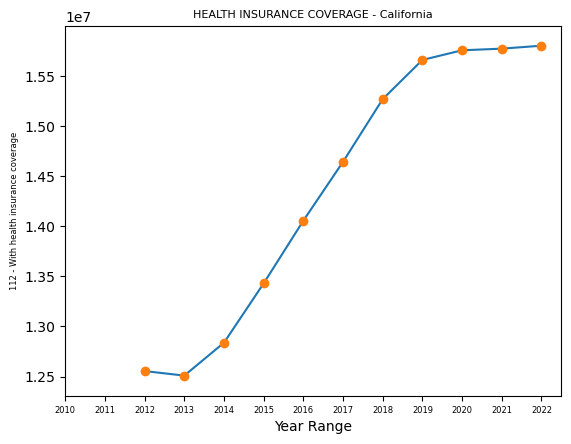

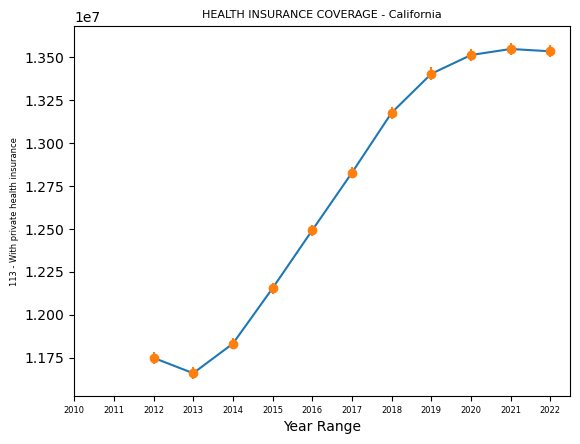

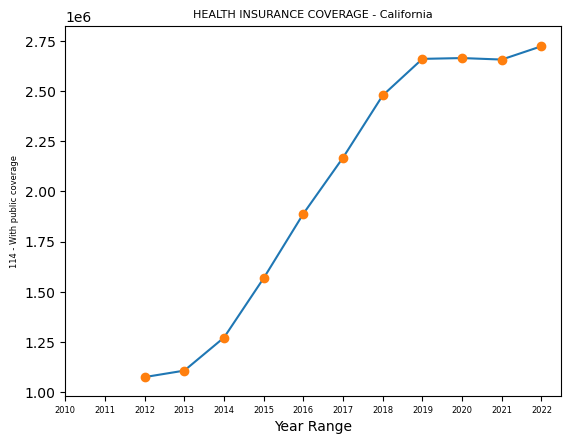

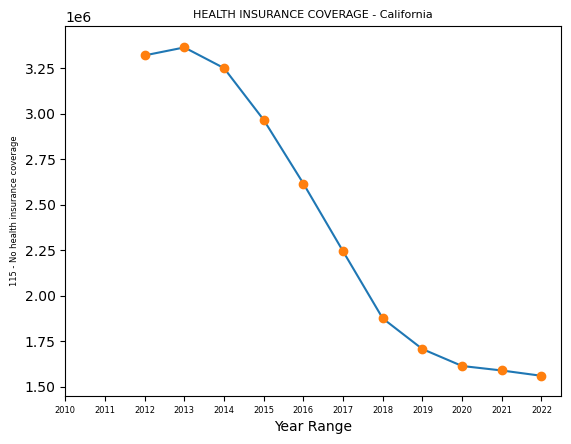

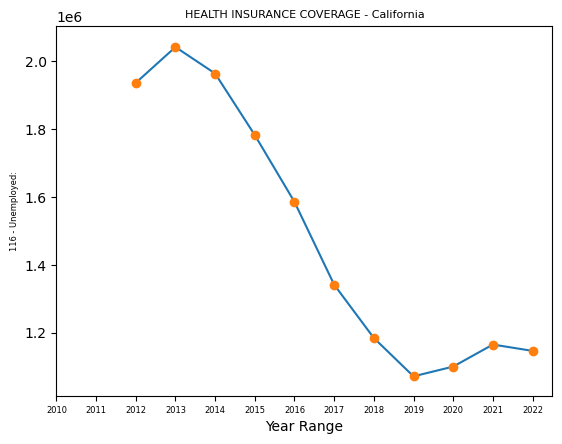

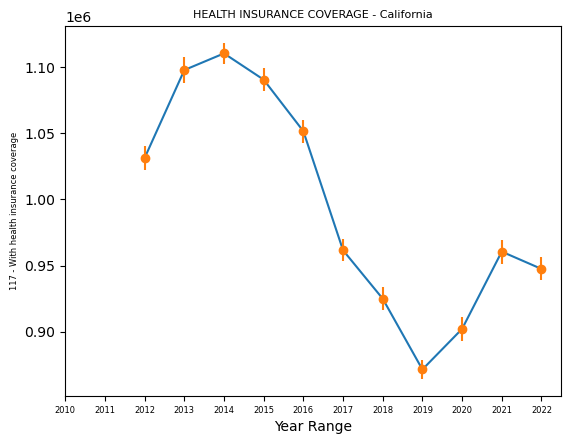

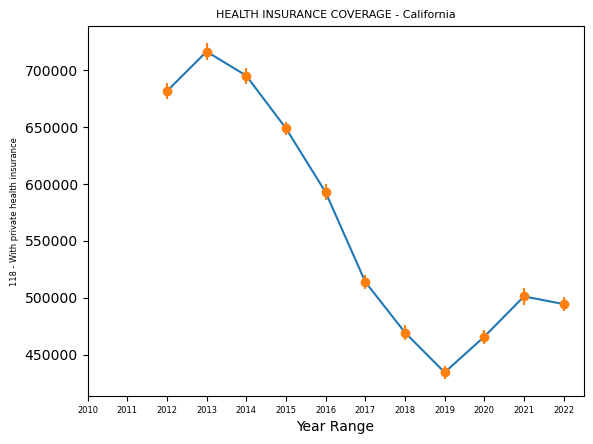

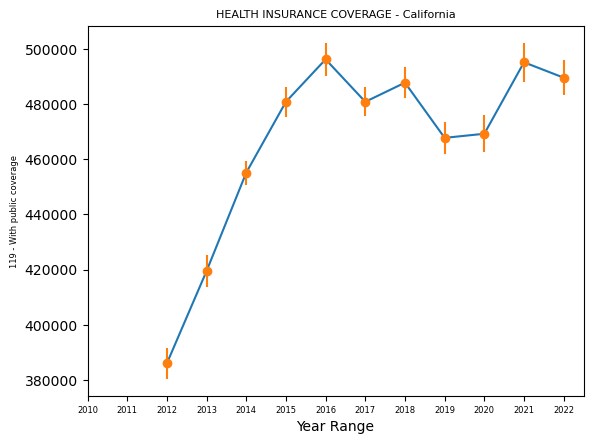

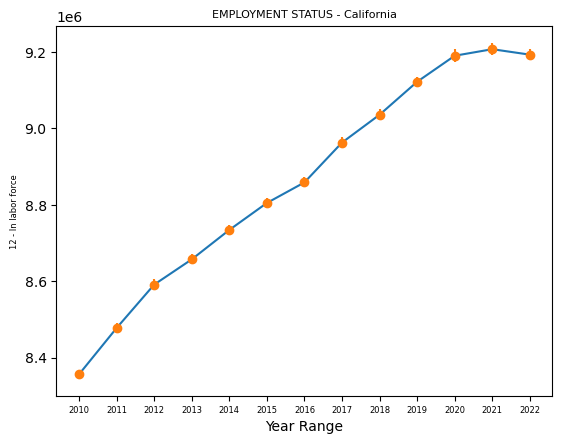

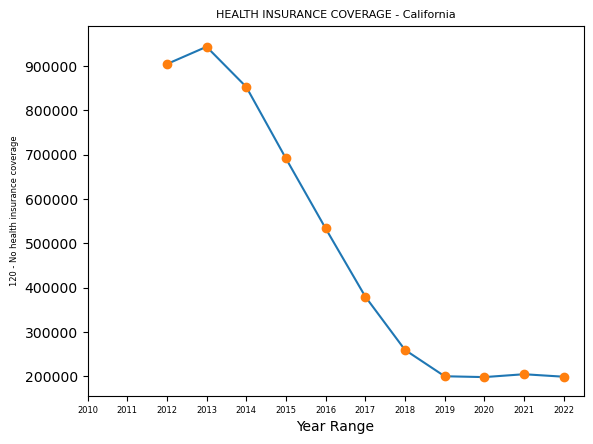

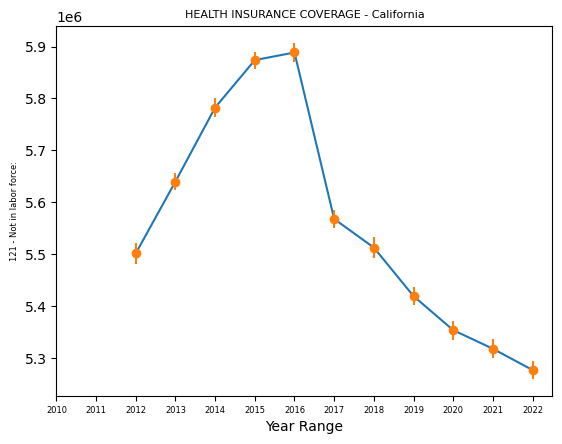

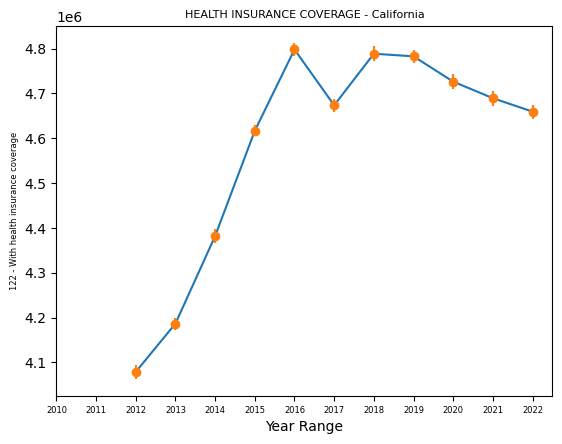

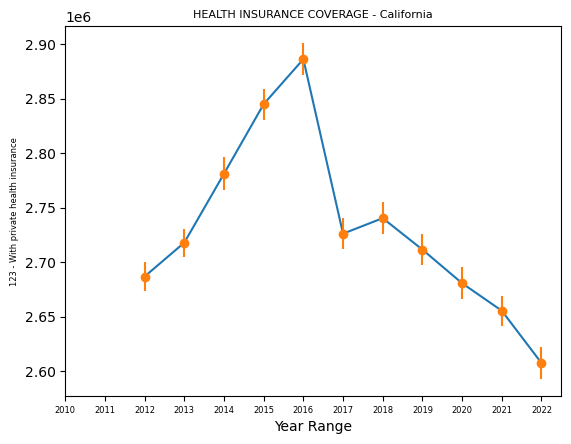

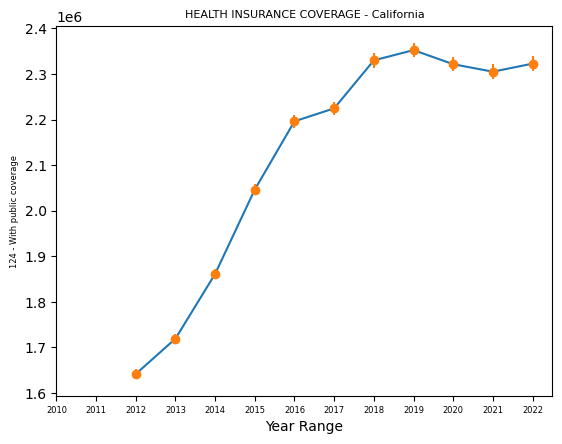

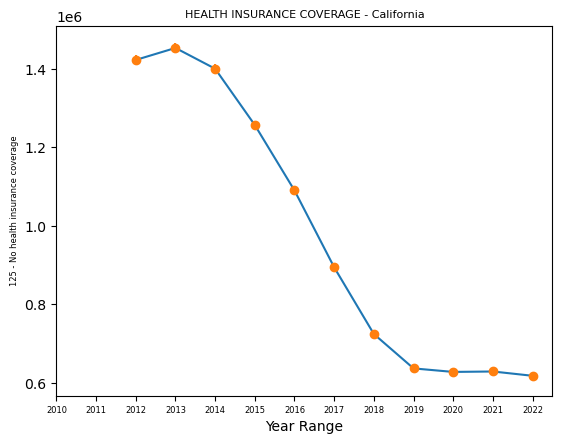

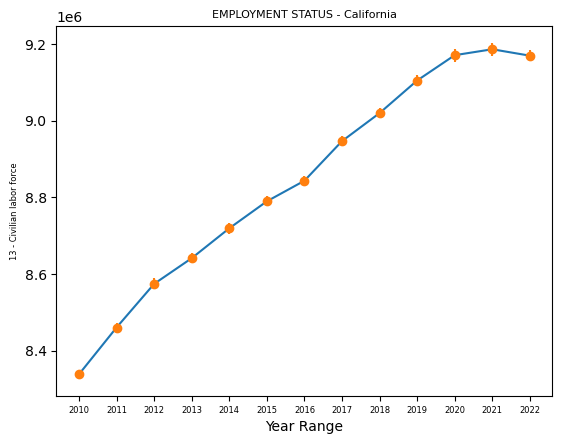

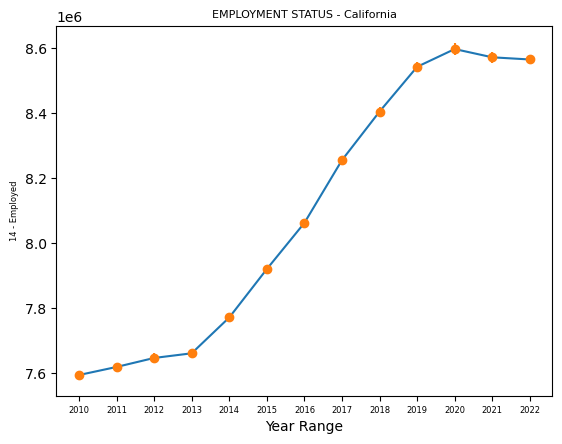

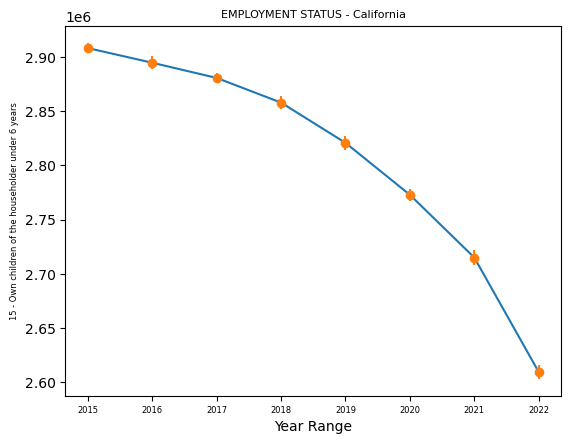

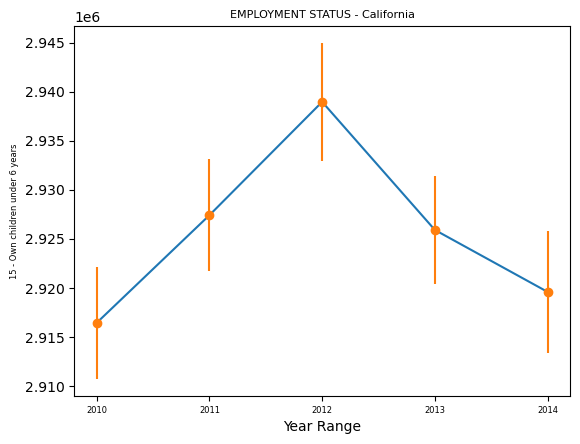

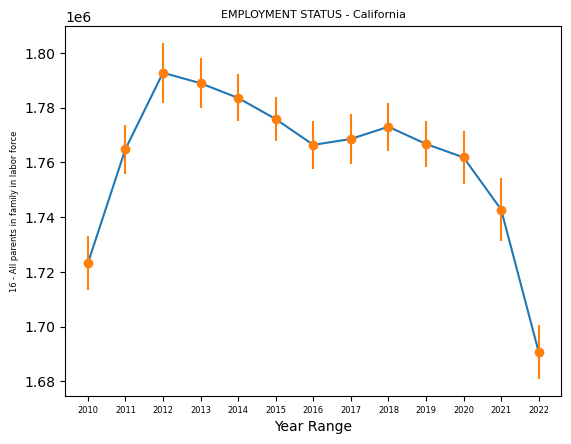

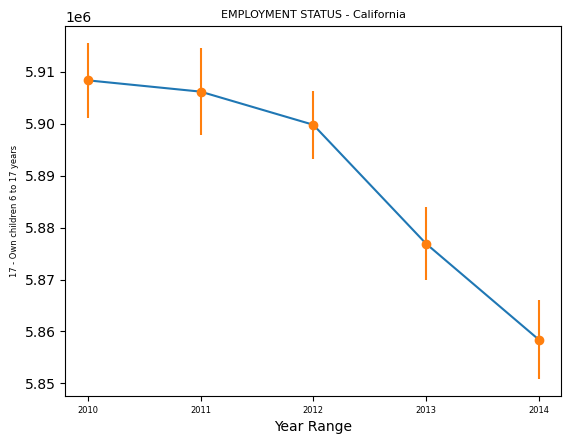

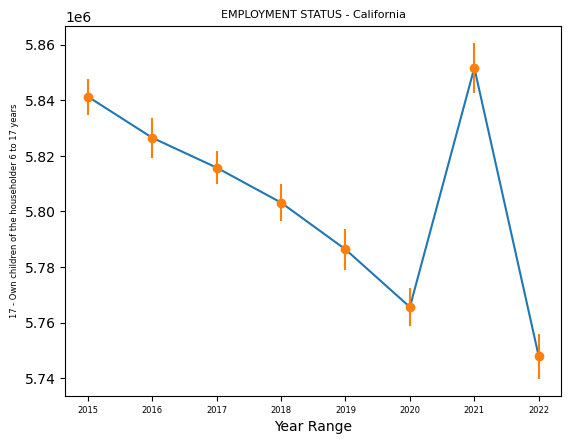

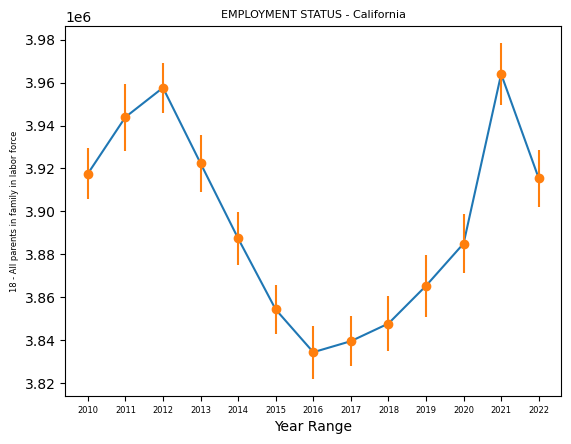

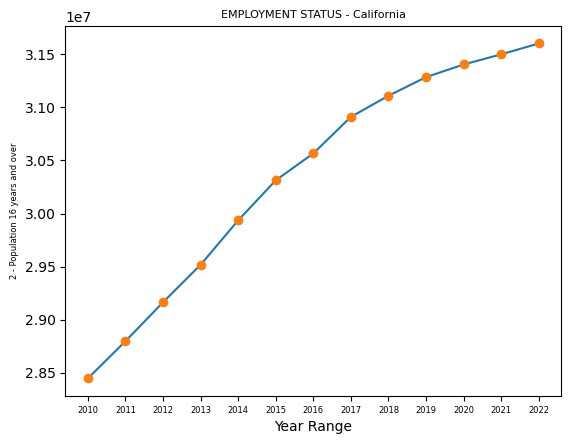

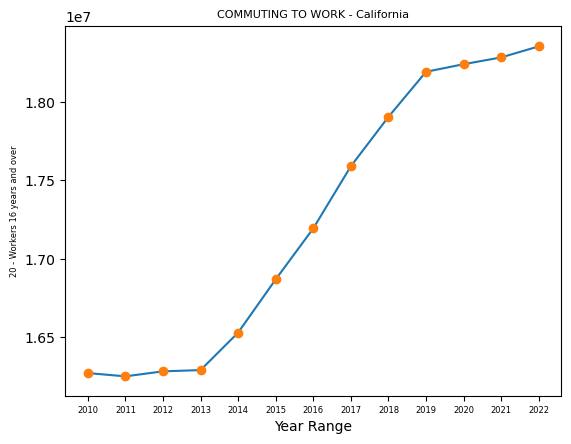

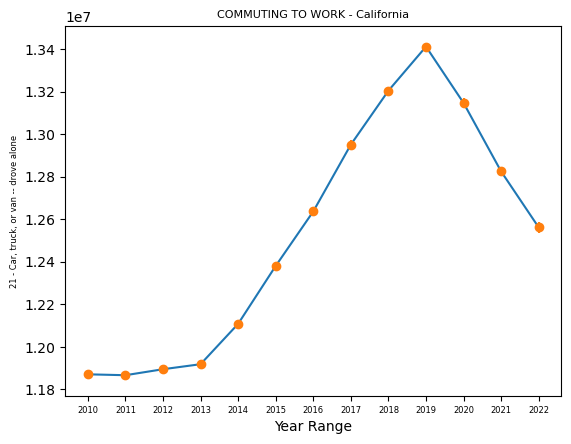

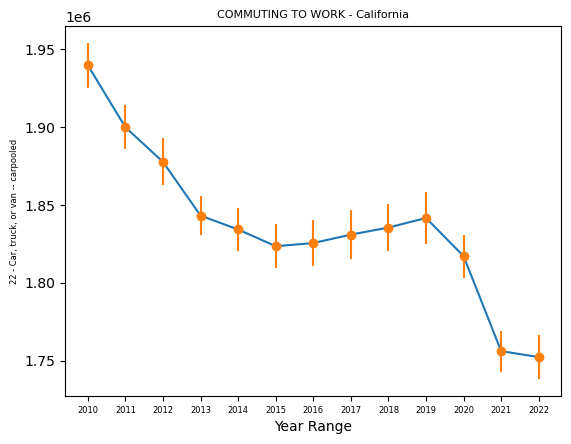

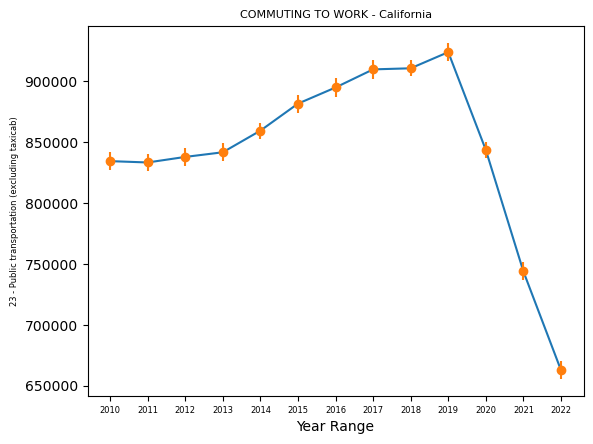

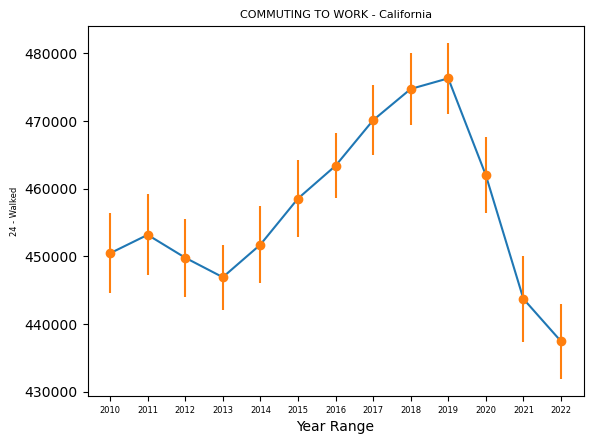

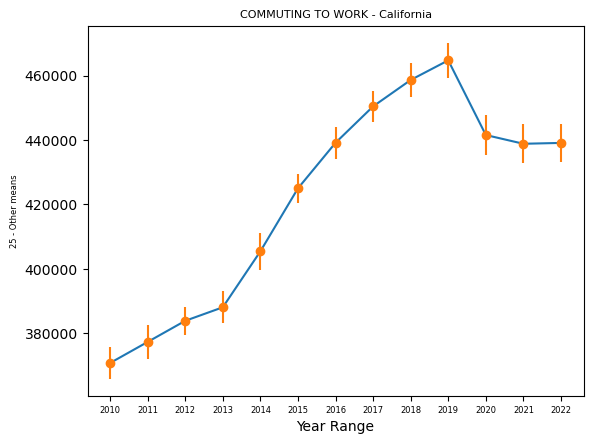

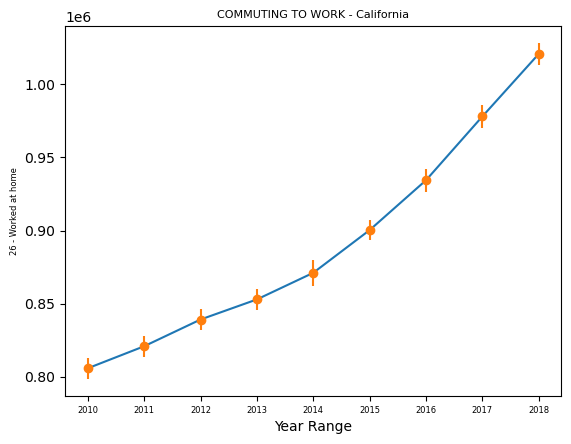

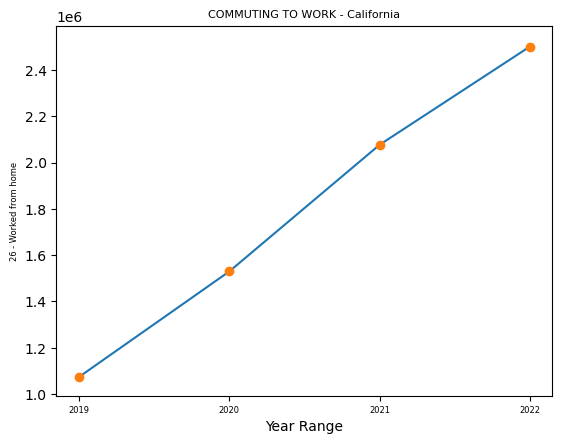

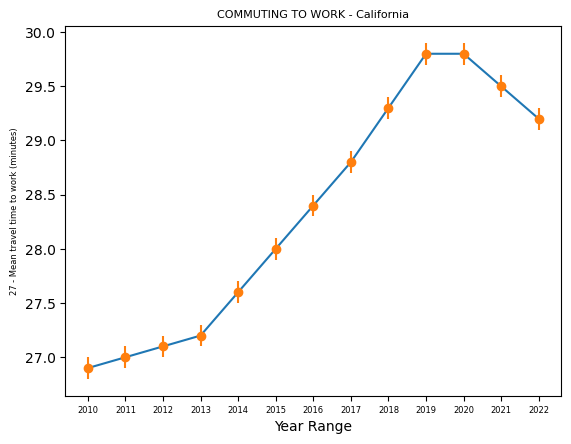

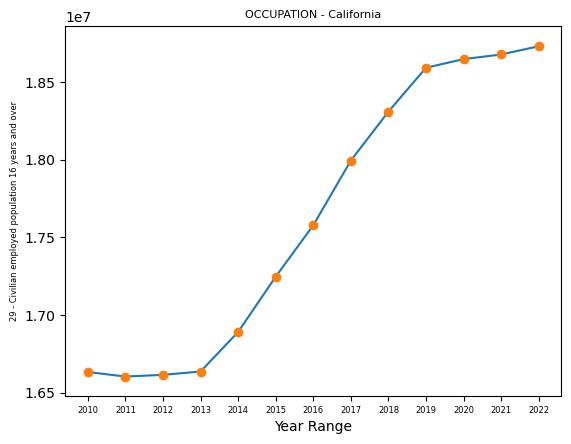

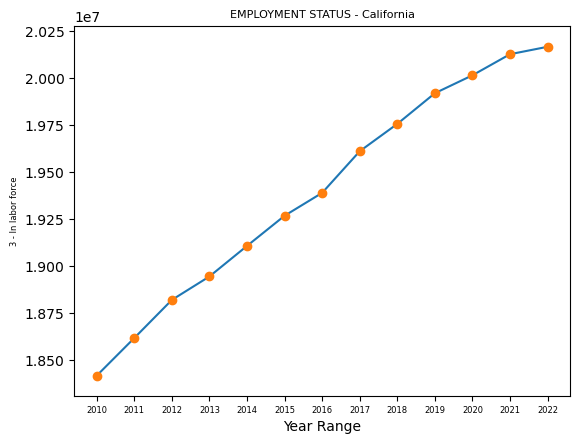

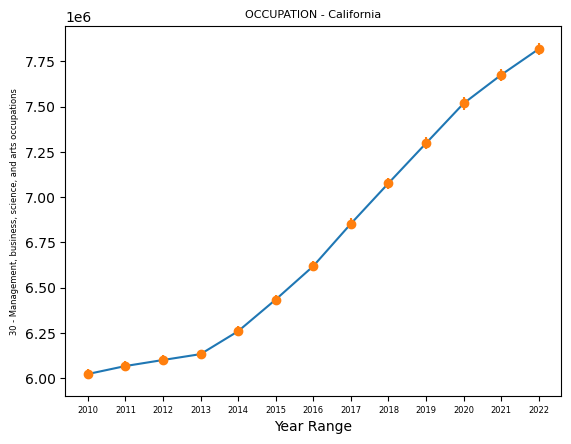

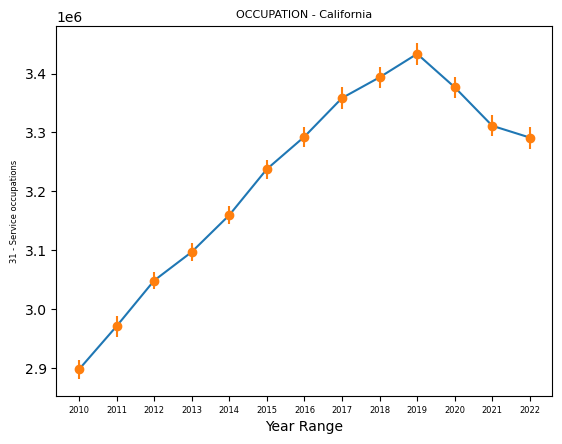

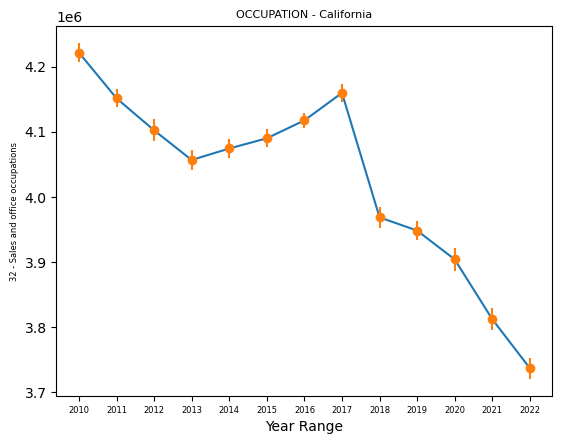

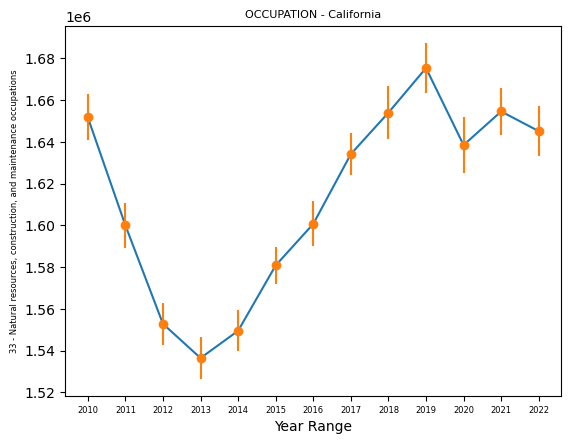

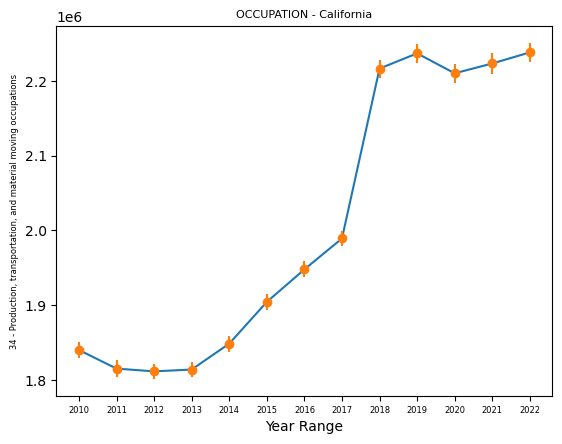

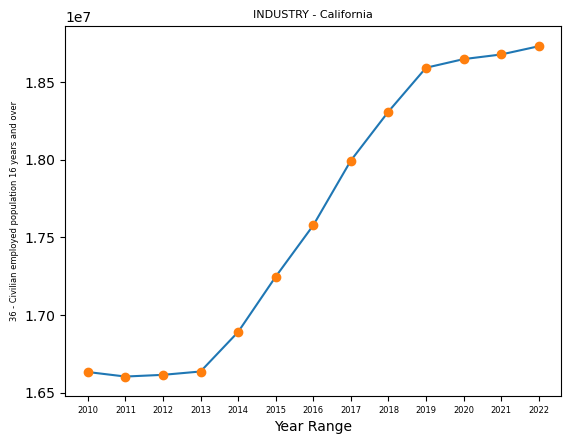

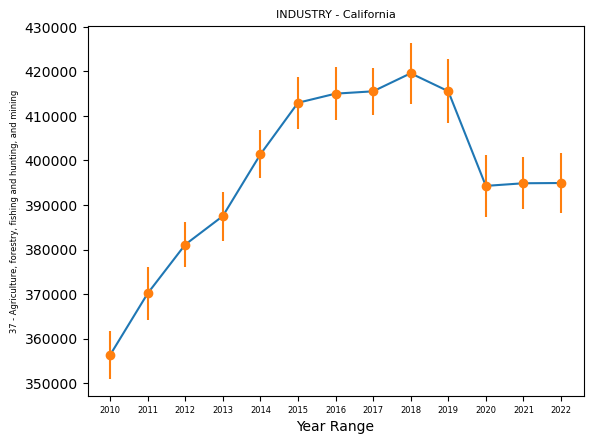

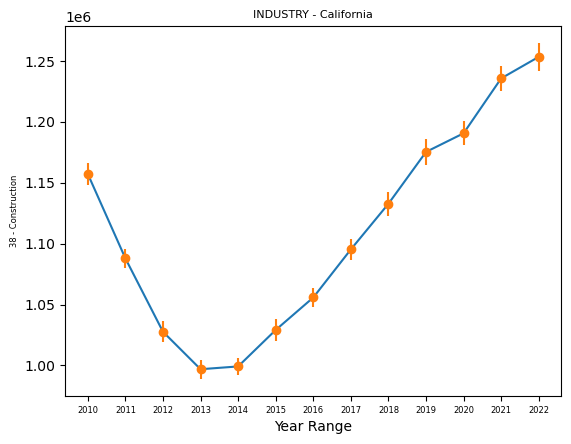

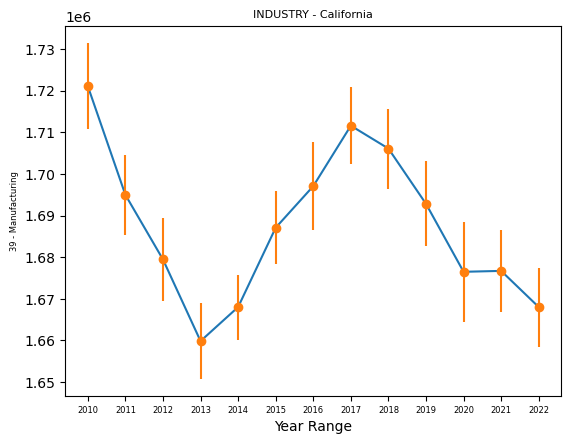

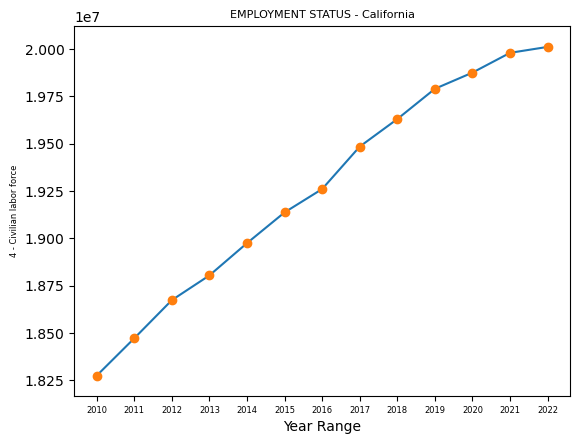

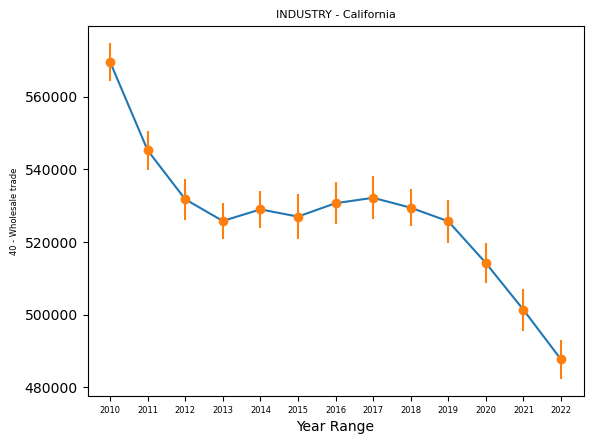

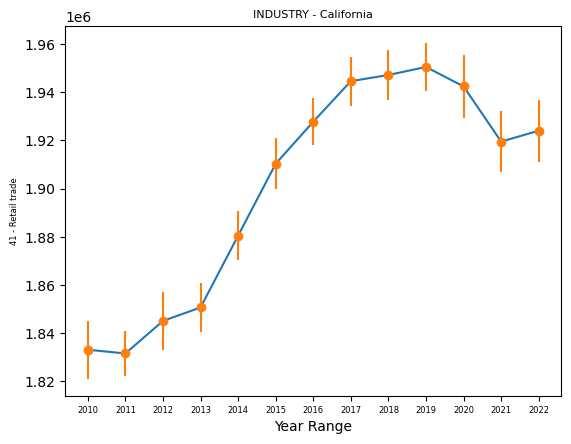

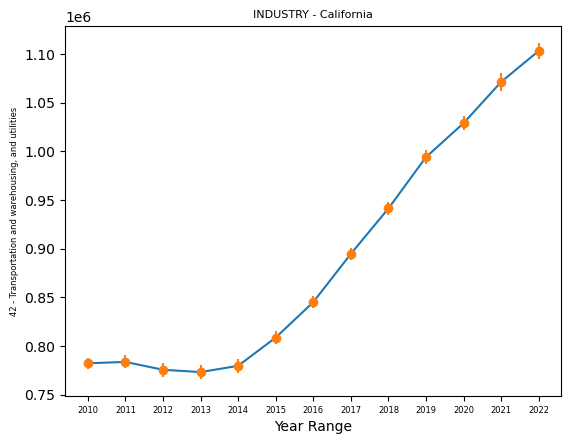

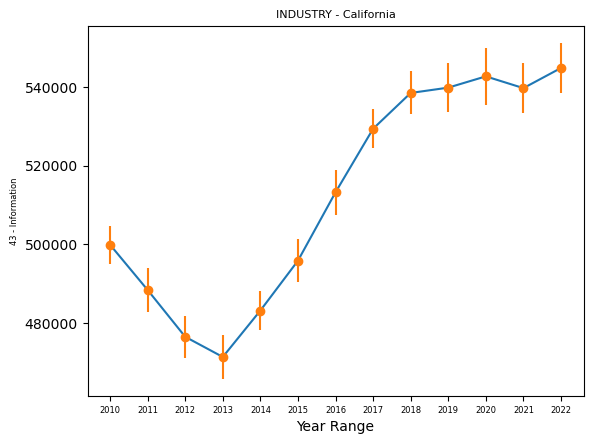

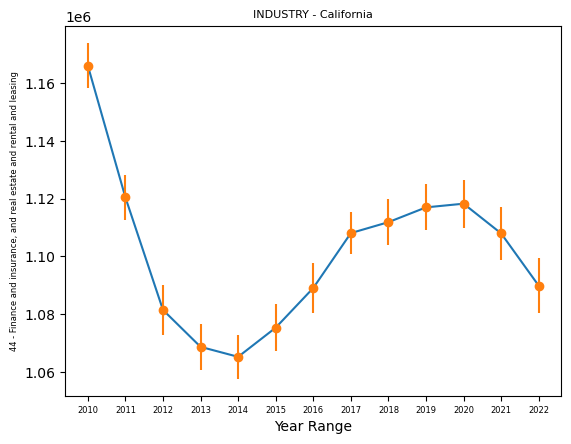

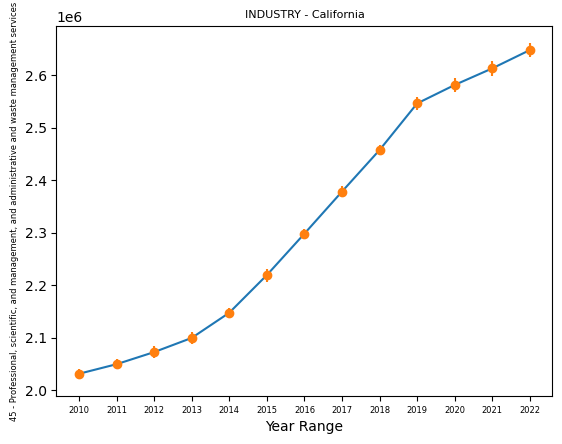

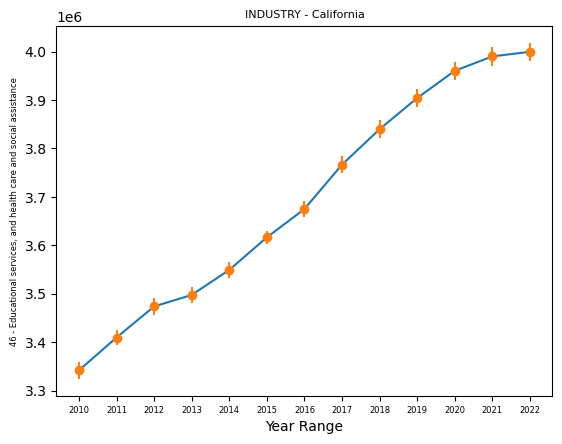

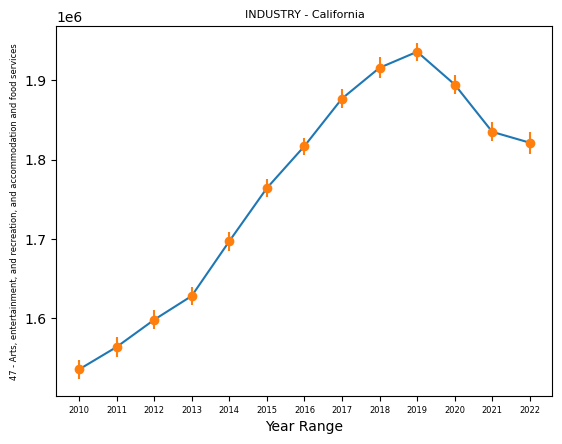

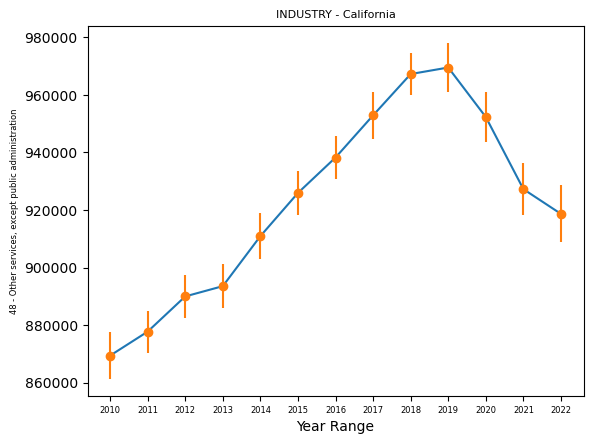

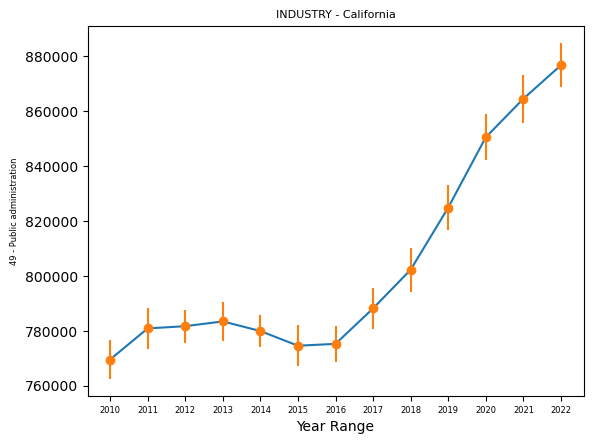

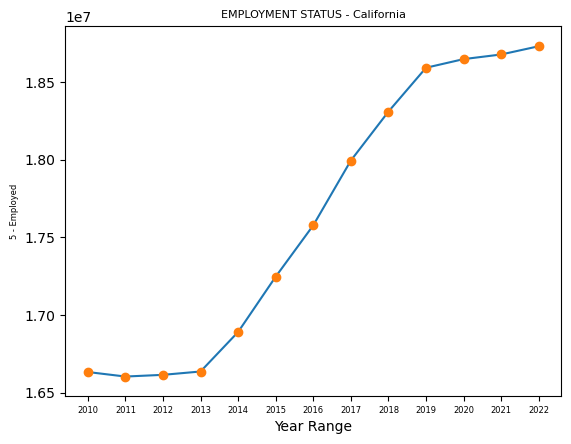

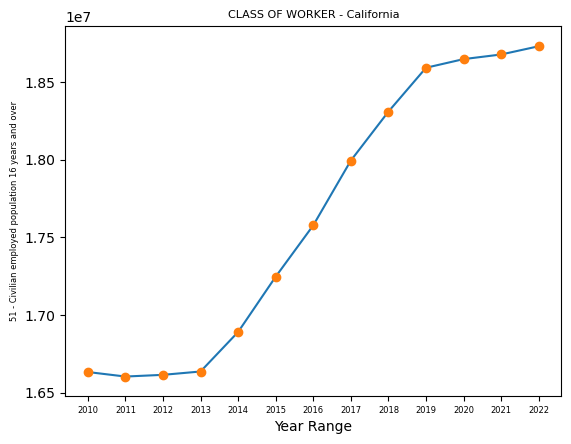

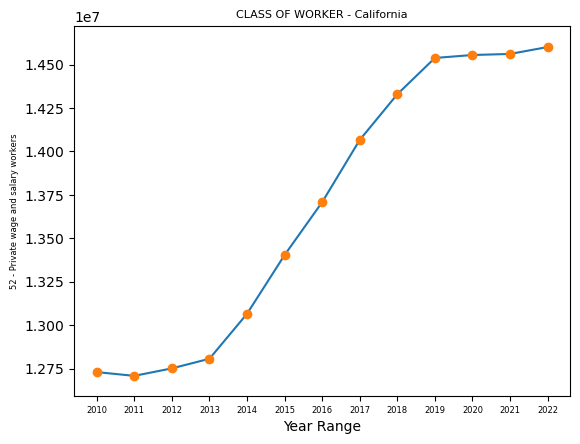

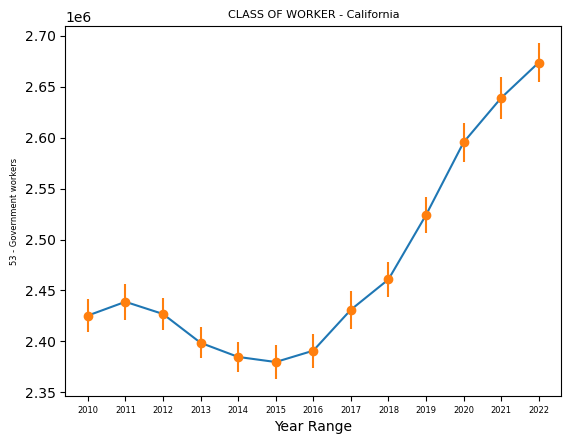

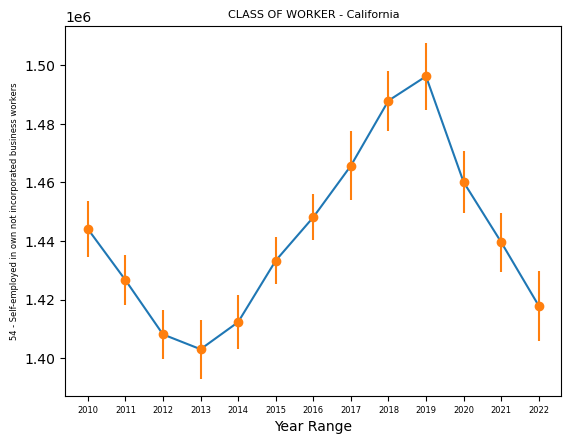

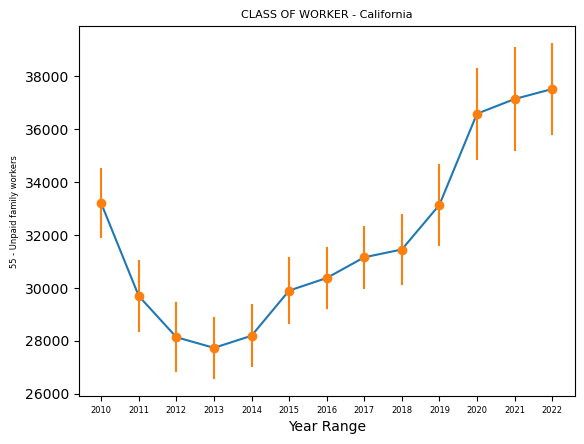

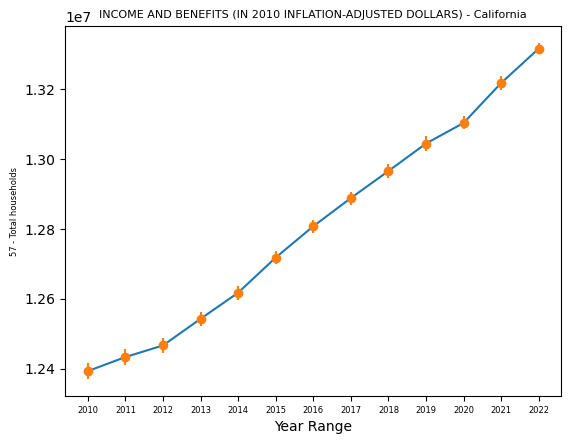

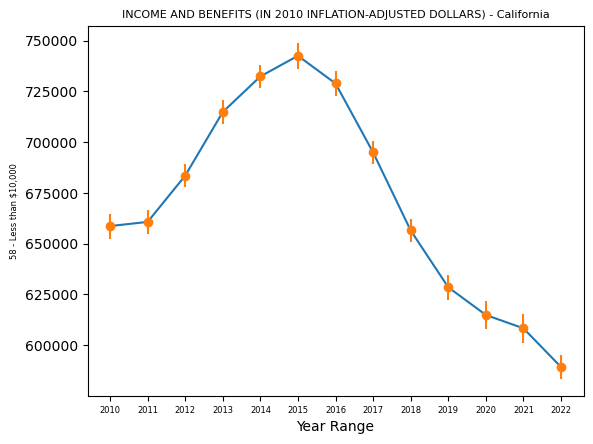

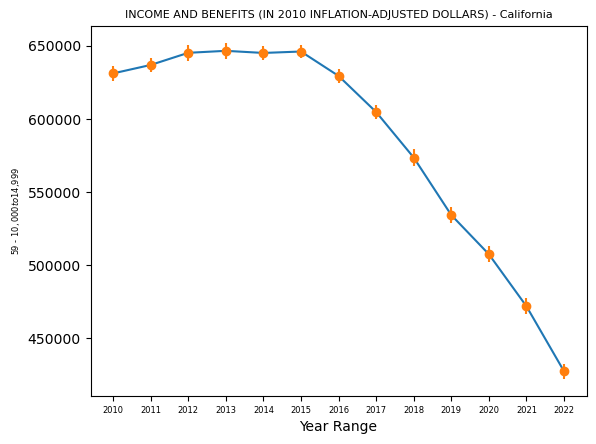

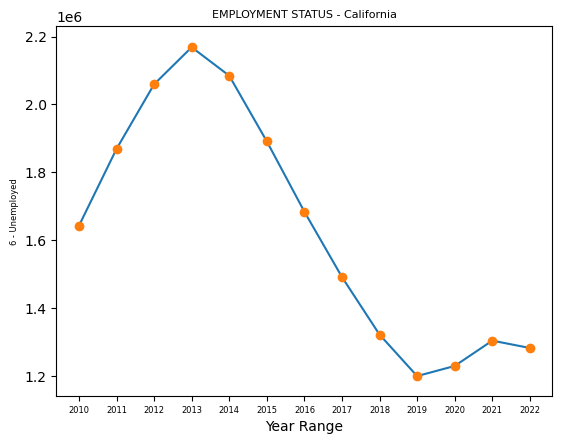

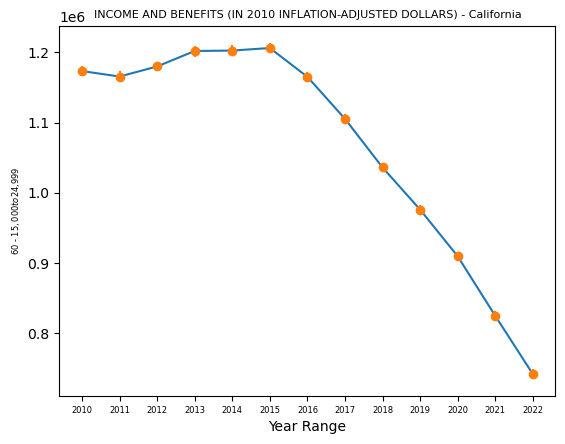

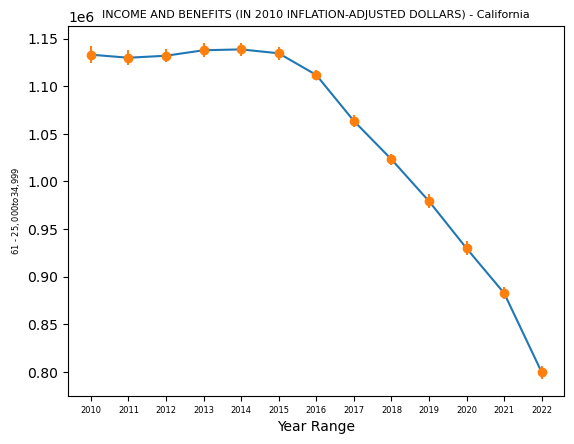

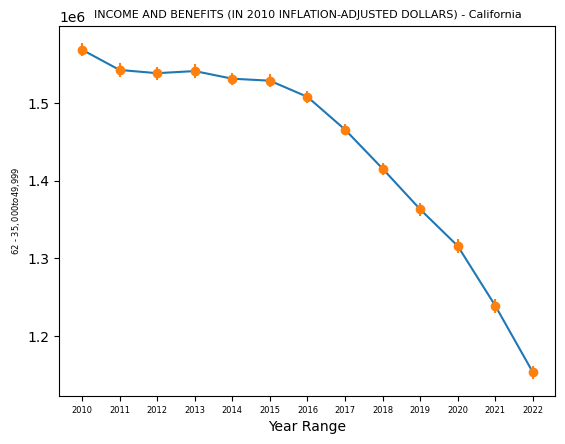

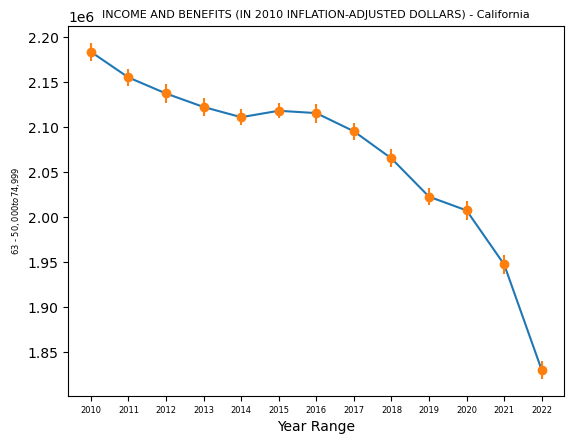

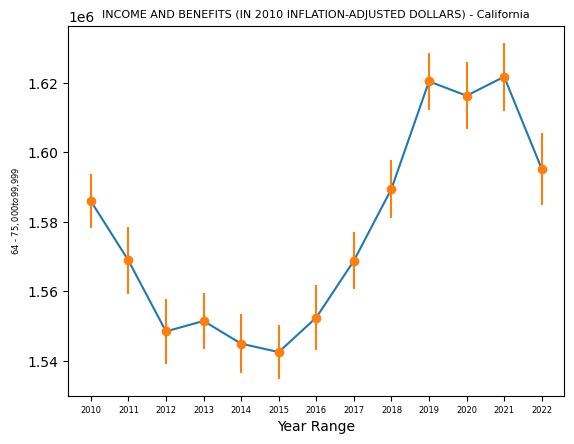

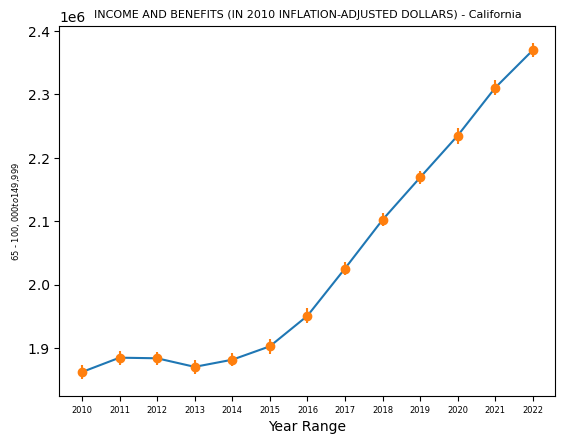

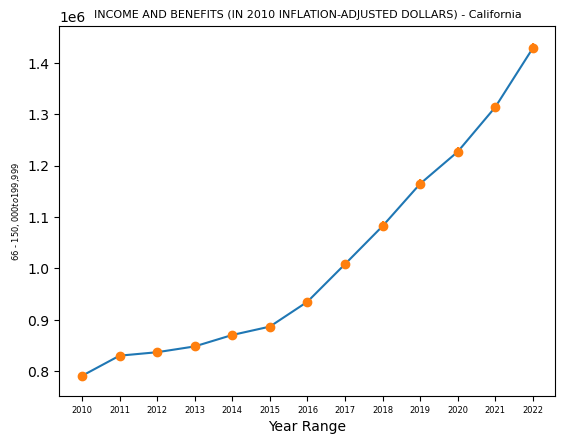

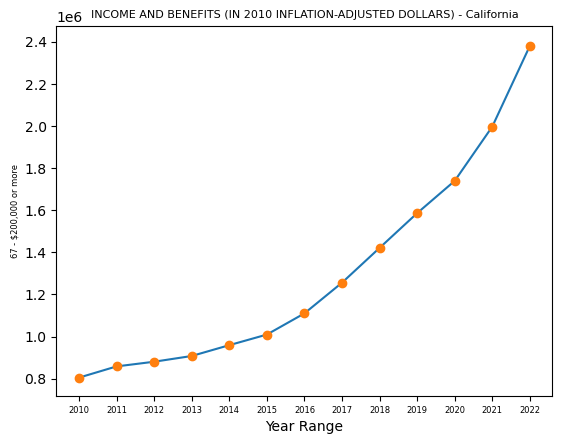

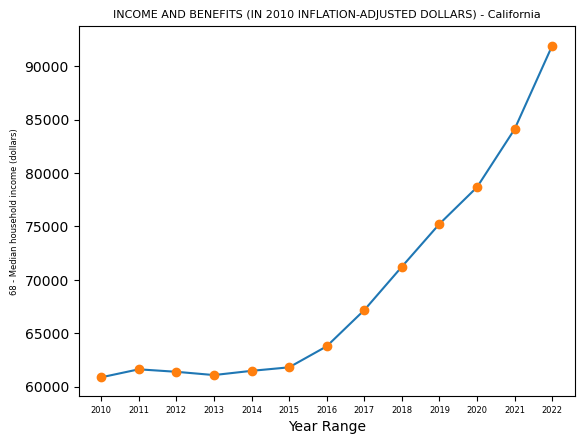

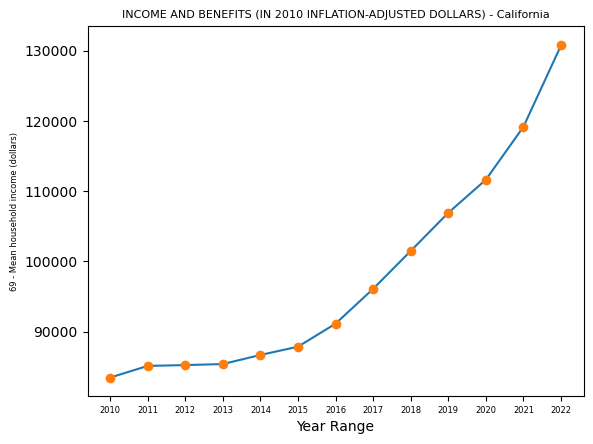

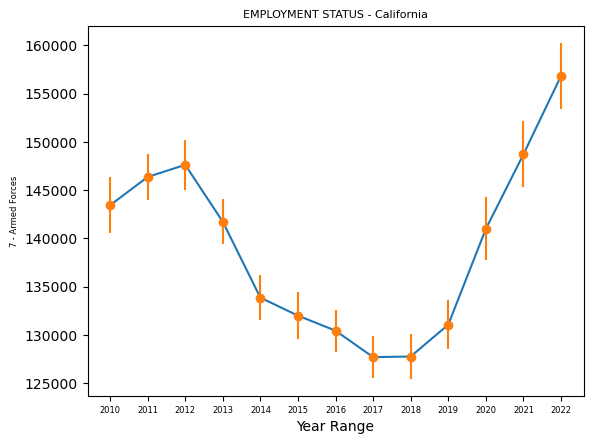

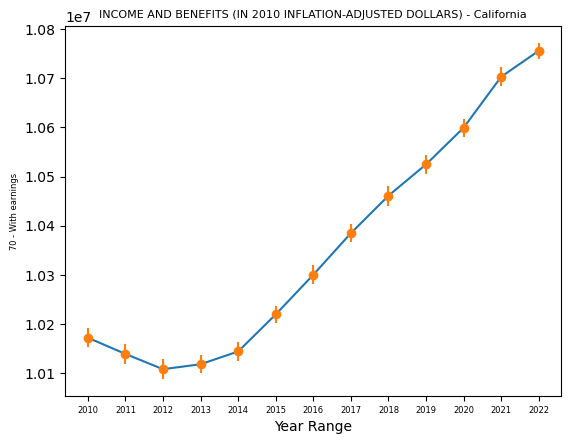

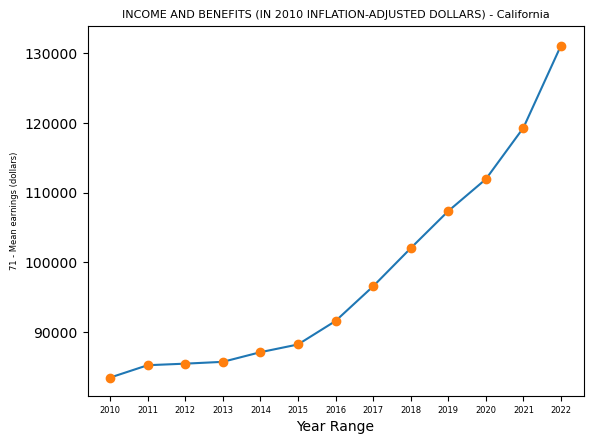

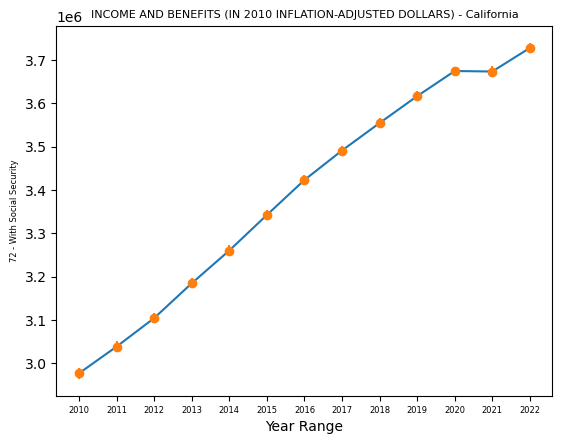

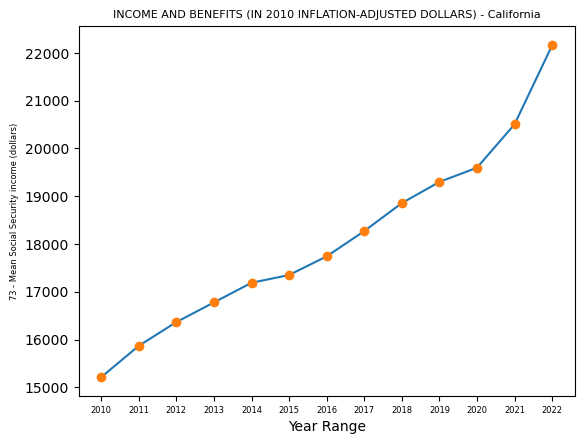

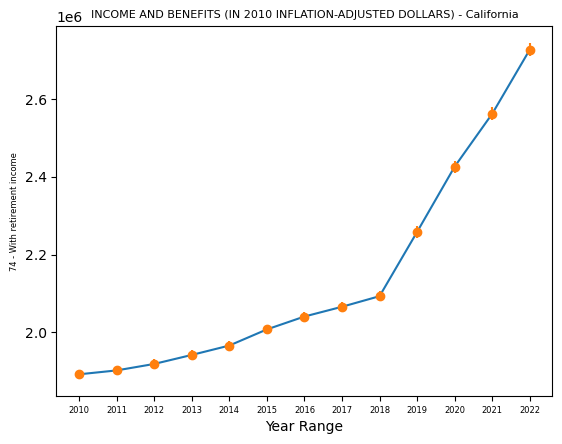

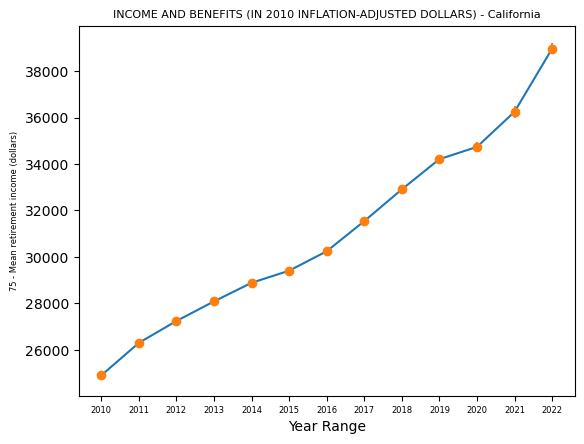

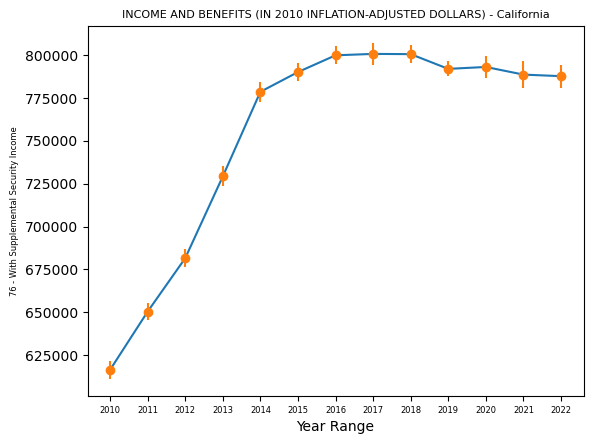

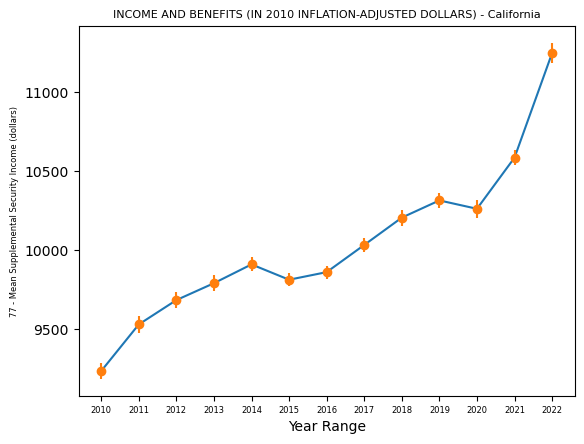

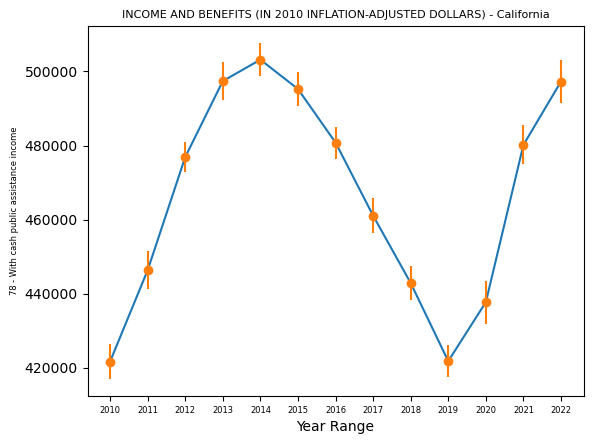

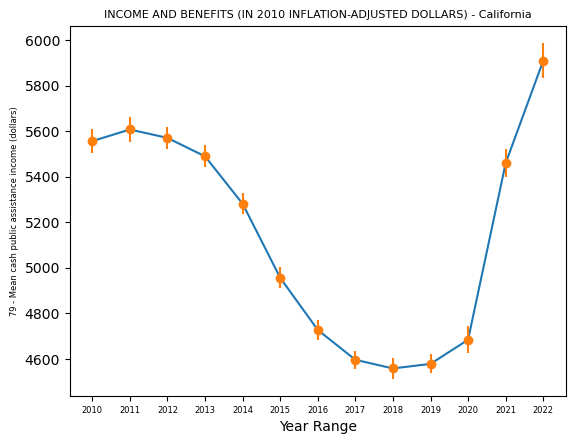

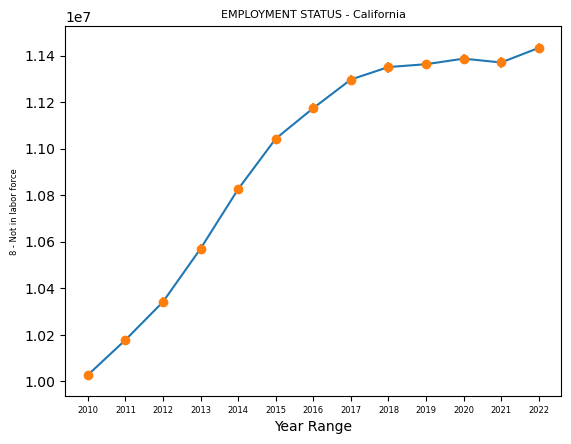

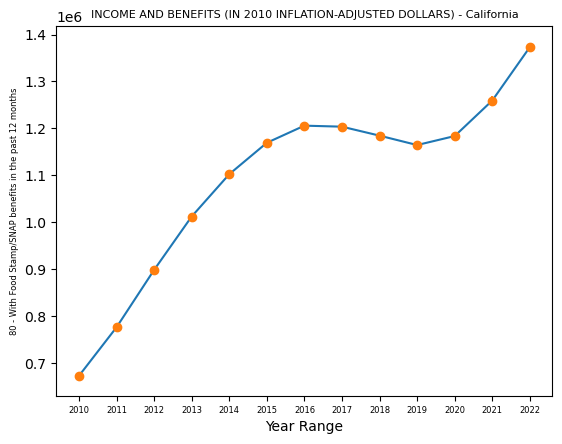

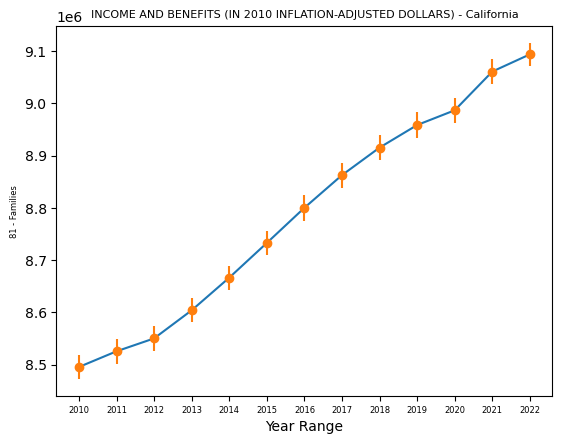

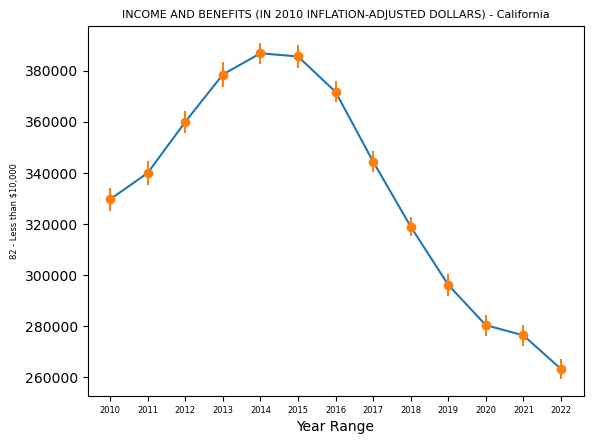

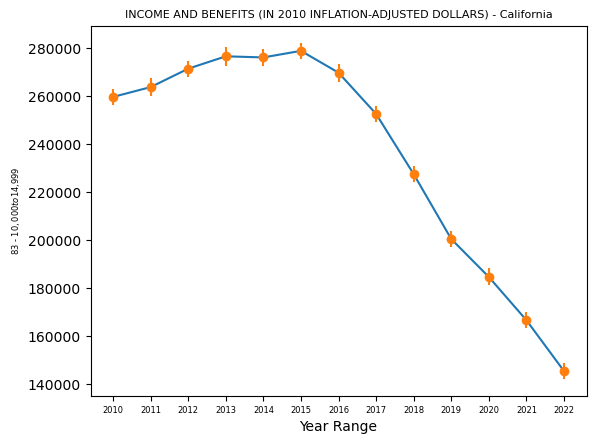

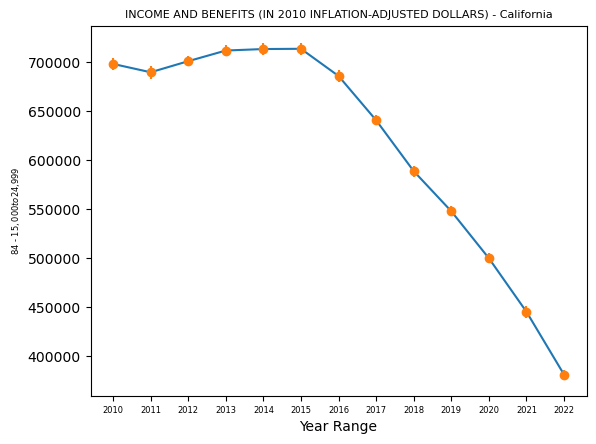

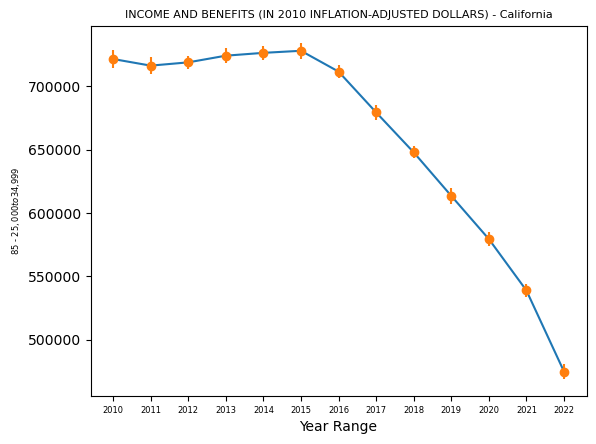

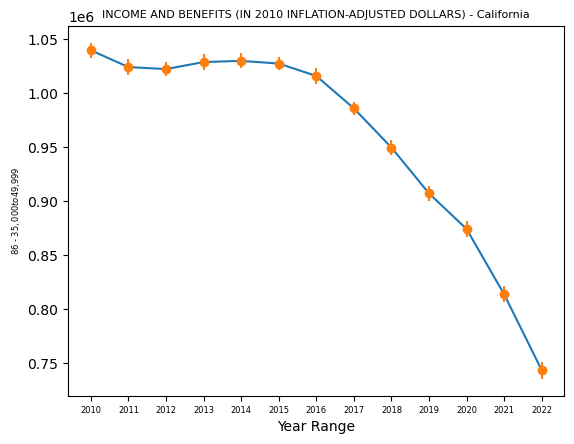

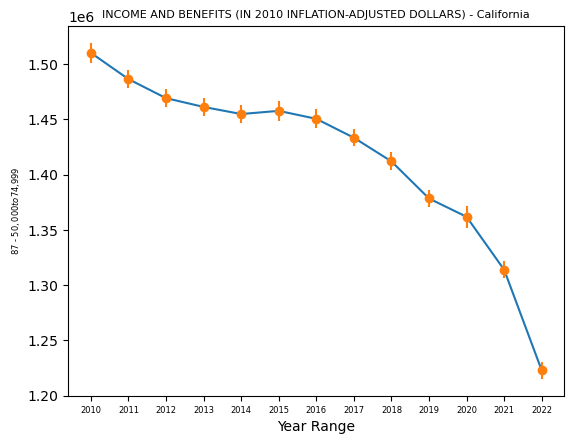

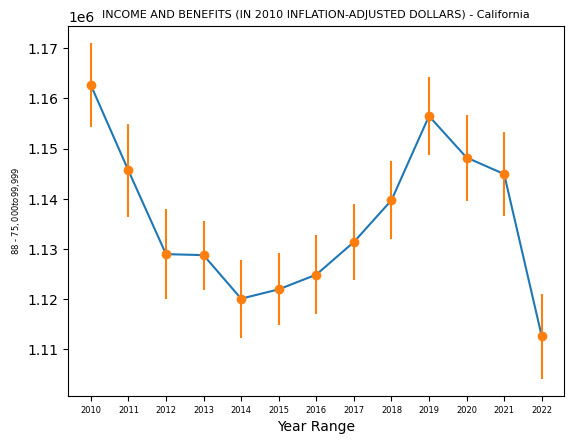

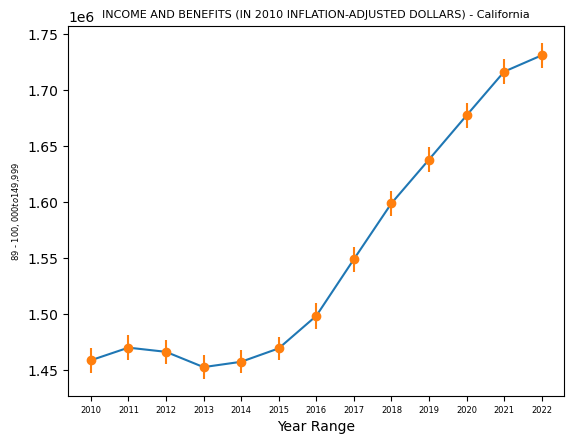

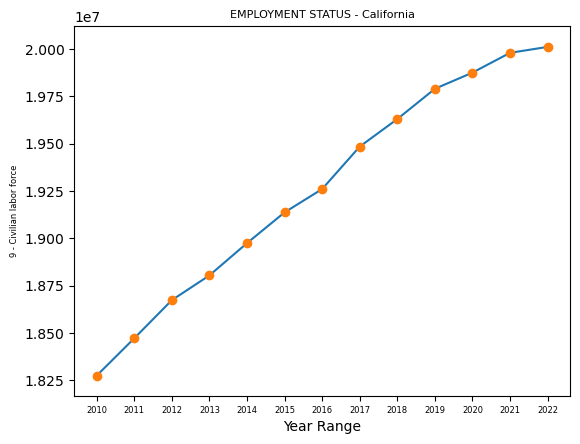

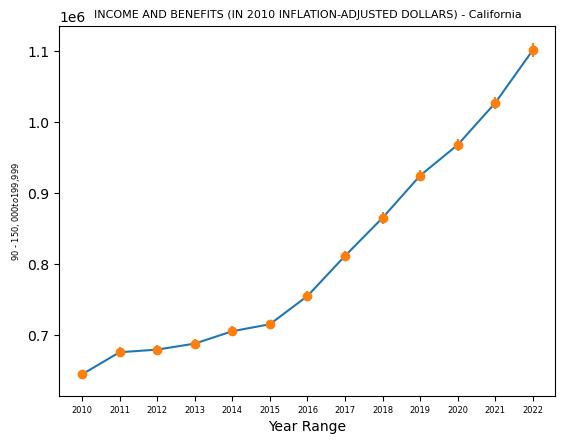

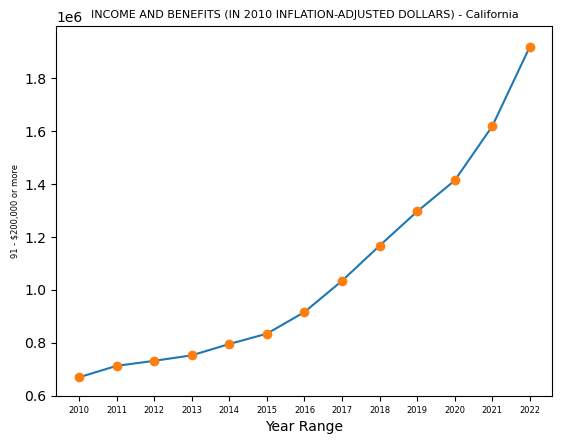

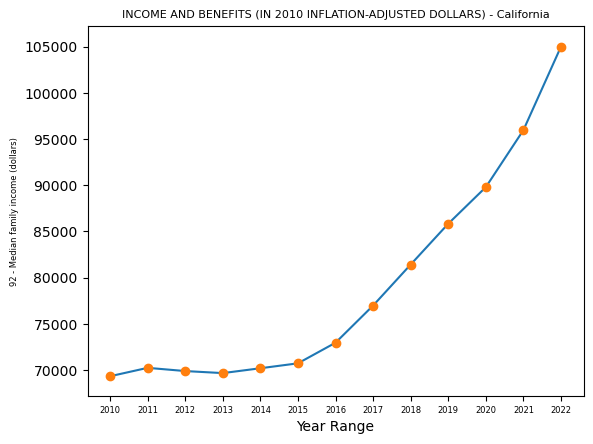

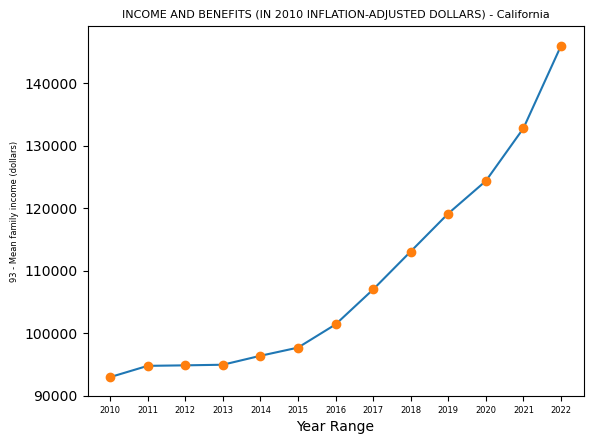

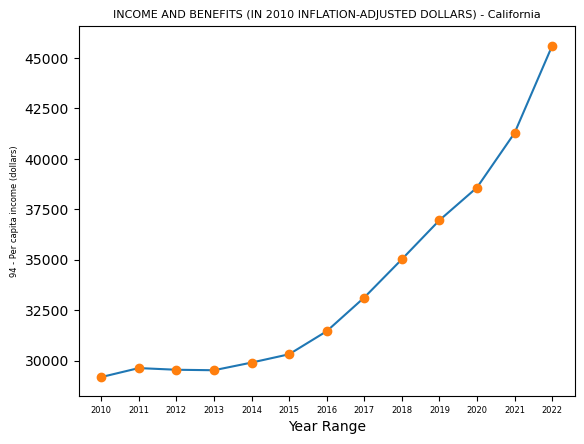

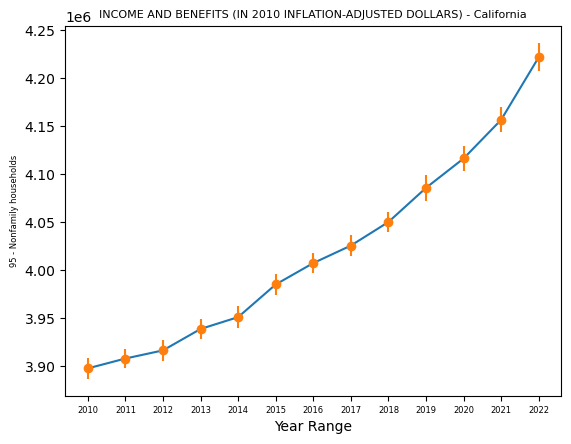

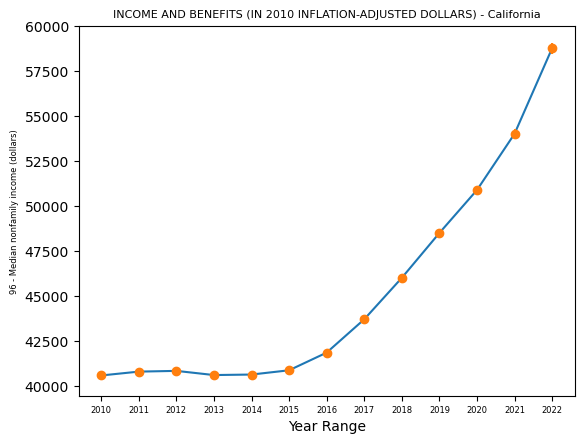

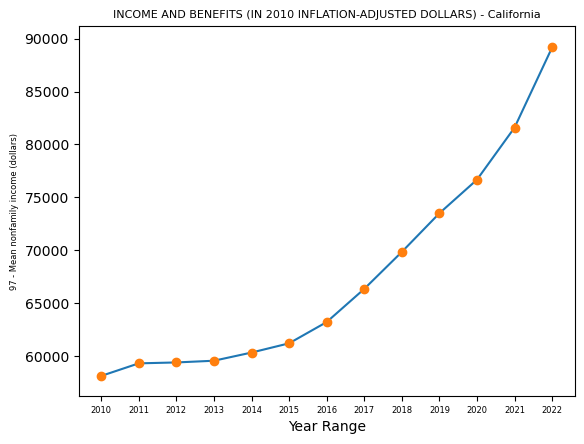

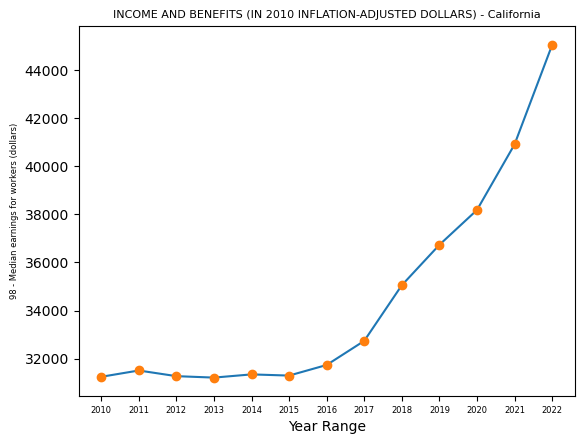

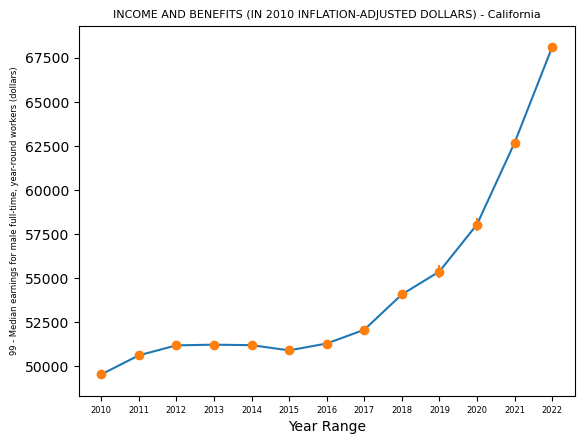

In [351]:
# Use to plot individual label trends, by year
# Be careful to set the label using the appropriate whitespace before the string

#label = "Population 16 years and over"
state = "California"
labels = list(set(rawData["Label (Grouping)"]))
labels.sort()

for label in labels: 
    currentData = rawData[(rawData["Label (Grouping)"] == label) & (rawData["State"] == state)]
    years = pd.to_numeric(currentData["Year"])
    
    yaxis = pd.to_numeric(currentData["Estimate"])
    yerr = pd.to_numeric(currentData["Margin of Error"]) 
    
    if yaxis.isna().all():
        continue 
    
    plt.plot(years, yaxis)
    plt.errorbar(years, yaxis,
                 yerr = yerr,
                 fmt ='o')
    plt.xlabel("Year Range")
    plt.ylabel(label, fontsize = 6)
    plt.xticks(np.arange(min(years), max(years)+1, 1.0), fontsize = 6)
    plt.title(rawData[(rawData["Label (Grouping)"] == label) & (rawData["State"] == state)]["Category"].values[0] + " - " + state, fontsize = 8)
    plt.show()